# Visualización con Matplotlib

Ahora analizaremos en profundidad el paquete Matplotlib para la visualización en Python.
Matplotlib es una biblioteca de visualización de datos multiplataforma basada en matrices NumPy y diseñada para funcionar con la pila SciPy más amplia.
Fue concebido por John Hunter en 2002, originalmente como un parche para IPython para habilitar el trazado interactivo estilo MATLAB a través de gnuplot desde la línea de comandos de IPython.
El creador de IPython, Fernando Pérez, estaba luchando por terminar su doctorado en ese momento y le hizo saber a John que no tendría tiempo de revisar el parche durante varios meses.
John tomó esto como una señal para establecerse por su cuenta, y nació el paquete Matplotlib, con la versión 0.1 lanzada en 2003.
Recibió un impulso temprano cuando se adoptó como el paquete de trazado elegido por el Instituto de Ciencias del Telescopio Espacial (la gente detrás del Telescopio Hubble), que apoyó financieramente el desarrollo de Matplotlib y amplió enormemente sus capacidades.
Una de las características más importantes de Matplotlib es su capacidad para funcionar bien con muchos sistemas operativos y backends gráficos.
Matplotlib admite docenas de backends y tipos de salida, lo que significa que puede contar con que funcionará independientemente del sistema operativo que esté utilizando o del formato de salida que desee.
Este enfoque multiplataforma de todo para todos ha sido una de las grandes fortalezas de Matplotlib.
Ha dado lugar a una gran base de usuarios, lo que a su vez ha dado lugar a una base activa de desarrolladores y a las potentes herramientas y la ubicuidad de Matplotlib dentro del mundo científico de Python.
Sin embargo, en los últimos años, la interfaz y el estilo de Matplotlib han comenzado a mostrar su edad.
Las herramientas más nuevas como ggplot y ggvis en el lenguaje R, junto con los kits de herramientas de visualización web basados ​​en D3js y el lienzo HTML5, a menudo hacen que Matplotlib parezca torpe y anticuado.
Aún así, soy de la opinión de que no podemos ignorar la fuerza de Matplotlib como un motor de gráficos multiplataforma bien probado.
Las versiones recientes de Matplotlib hacen que sea relativamente fácil establecer nuevos estilos de trazado global (consulte [Personalización de Matplotlib: Configuraciones y hojas de estilo](04.11-Configuraciones-y-hojas-de-estilo.ipynb)), y la gente ha estado desarrollando nuevos paquetes que se basan en sus potentes componentes internos para impulsar Matplotlib a través de API más limpias y modernas, por ejemplo, Seaborn (discutido en [Visualización con Seaborn](04.14-Visualización-con-Seaborn.ipynb)) , [ggpy](http://yhat.github.io/ggpy/), [HoloViews](http://holoviews.org/), [Altair](http://altair-viz.github.io/) e incluso Pandas se pueden usar como envoltorios de la API de Matplotlib.
Incluso con envoltorios como estos, a menudo es útil sumergirse en la sintaxis de Matplotlib para ajustar el resultado final de la trama.
Por esta razón, creo que Matplotlib en sí mismo seguirá siendo una pieza vital de la pila de visualización de datos, incluso si las nuevas herramientas significan que la comunidad se aleja gradualmente del uso directo de la API de Matplotlib.

## Consejos generales de Matplotlib
Antes de sumergirnos en los detalles de la creación de visualizaciones con Matplotlib, hay algunas cosas útiles que debe saber sobre el uso del paquete.

### Importando Matplotlib
Así como usamos la abreviatura ``np`` para NumPy y la abreviatura ``pd`` para Pandas, usaremos algunas abreviaturas estándar para las importaciones de Matplotlib:

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

La interfaz ``plt`` es la que usaremos más a menudo, como veremos a lo largo de este capítulo.

### Estilos de configuración
Usaremos la directiva ``plt.style`` para elegir estilos estéticos apropiados para nuestras figuras.
Aquí estableceremos el estilo ``clásico``, lo que garantiza que los gráficos que creamos utilicen el estilo clásico de Matplotlib:

In [ ]:
plt.style.use('classic')

A lo largo de esta sección, ajustaremos este estilo según sea necesario.
Tenga en cuenta que las hojas de estilo utilizadas aquí son compatibles a partir de la versión 1.5 de Matplotlib; si está utilizando una versión anterior de Matplotlib, solo está disponible el estilo predeterminado.
Para obtener más información sobre las hojas de estilo, consulte [Personalización de Matplotlib: Configuraciones y hojas de estilo](04.11-Configuraciones-y-hojas-de-estilo.ipynb).

### ``mostrar()`` o No ``mostrar()``? Cómo mostrar sus parcelas

Una visualización que no puede ver no será de mucha utilidad, pero la forma en que ve sus gráficos de Matplotlib depende del contexto.
El mejor uso de Matplotlib difiere según cómo lo esté usando; aproximadamente, los tres contextos aplicables usan Matplotlib en un script, en una terminal de IPython o en un cuaderno de IPython.

#### Trazado desde un script
Si está utilizando Matplotlib desde un script, la función ``plt.show()`` es su amiga.
``plt.show()`` inicia un ciclo de eventos, busca todos los objetos de figura actualmente activos y abre una o más ventanas interactivas que muestran su figura o figuras.
Entonces, por ejemplo, puede tener un archivo llamado *myplot.py* que contiene lo siguiente:
```python
# ------- file: myplot.py ------
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()
```
Luego puede ejecutar este script desde el indicador de la línea de comandos, lo que dará como resultado que se abra una ventana con su figura mostrada:
```
$ python myplot.py
```
El comando ``plt.show()`` hace mucho bajo el capó, ya que debe interactuar con el backend gráfico interactivo de su sistema.
Los detalles de esta operación pueden variar mucho de un sistema a otro e incluso de una instalación a otra, pero matplotlib hace todo lo posible para ocultarle todos estos detalles.
Una cosa a tener en cuenta: el comando ``plt.show()`` debe usarse *solo una vez* por sesión de Python, y se ve con mayor frecuencia al final del script.
Múltiples comandos ``show()`` pueden conducir a un comportamiento impredecible dependiente del backend, y en su mayoría deben evitarse.

#### Trazado desde un shell de IPython
Puede ser muy conveniente usar Matplotlib de forma interactiva dentro de un shell de IPython (ver [IPython: Más allá del Python normal](01.00-IPython-Más-allá-del-Python-normal)).
IPython está diseñado para funcionar bien con Matplotlib si especifica el modo Matplotlib.
Para habilitar este modo, puede usar el comando mágico ``%matplotlib`` después de iniciar ``ipython``:
```ipython
In [1]: %matplotlib
Using matplotlib backend: TkAgg

In [2]: import matplotlib.pyplot as plt
```
En este punto, cualquier comando de gráfico ``plt`` hará que se abra una ventana de figura, y se pueden ejecutar más comandos para actualizar el gráfico.
Algunos cambios (como la modificación de las propiedades de las líneas que ya están dibujadas) no se dibujarán automáticamente: para forzar una actualización, use ``plt.draw()``.
No es necesario usar ``plt.show()`` en modo Matplotlib.

#### Trazado desde un cuaderno de IPython
El cuaderno de IPython es una herramienta de análisis de datos interactiva basada en navegador que puede combinar narrativa, código, gráficos, elementos HTML y mucho más en un único documento ejecutable (ver [IPython: Más allá del Python normal](01.00-IPython-Más-allá-del-Python-normal.ipynb)).
El trazado interactivo dentro de un cuaderno de IPython se puede hacer con el comando ``%matplotlib`` y funciona de manera similar al shell de IPython.
En el cuaderno de IPython, también tiene la opción de incrustar gráficos directamente en el cuaderno, con dos opciones posibles:
- ``%matplotlib notebook`` dará lugar a gráficos *interactivos* incrustados en el cuaderno
- ``%matplotlib inline`` conducirá a imágenes *estáticas* de su trama incrustadas en el cuaderno
Para este libro, generalmente optaremos por ``%matplotlib inline``:

In [ ]:
%matplotlib inline

Después de ejecutar este comando (solo debe hacerse una vez por núcleo/sesión), cualquier celda dentro del cuaderno que cree un gráfico incrustará una imagen PNG del gráfico resultante:

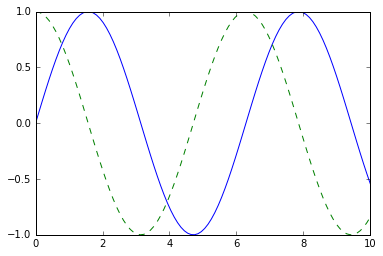

In [ ]:
import numpy as np
x = np.linspace(0, 10, 100)

fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

### Guardar figuras en un archivo
Una buena característica de Matplotlib es la capacidad de guardar figuras en una amplia variedad de formatos.
Se puede guardar una figura usando el comando ``savefig()``.
Por ejemplo, para guardar la figura anterior como un archivo PNG, puede ejecutar esto:

In [ ]:
fig.savefig('my_figure.png')

Ahora tenemos un archivo llamado ``my_figure.png`` en el directorio de trabajo actual:

In [ ]:
!ls -lh my_figure.png

-rw-r--r--  1 jakevdp  staff    16K Aug 11 10:59 my_figure.png


Para confirmar que contiene lo que creemos que contiene, usemos el objeto ``Image`` de IPython para mostrar el contenido de este archivo:

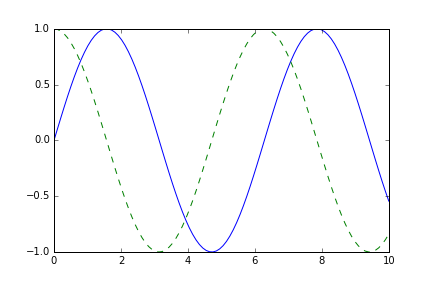

In [ ]:
from IPython.display import Image
Image('my_figure.png')

En ``savefig()``, el formato del archivo se deduce de la extensión del nombre de archivo dado.
Según los backends que haya instalado, hay muchos formatos de archivo diferentes disponibles.
La lista de tipos de archivos admitidos se puede encontrar para su sistema utilizando el siguiente método del objeto de lienzo de figura:

In [ ]:
fig.canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpeg': 'Joint Photographic Experts Group',
 'jpg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

Tenga en cuenta que al guardar su figura, no es necesario usar ``plt.show()`` o los comandos relacionados discutidos anteriormente.

## Dos interfaces por el precio de una
Una característica potencialmente confusa de Matplotlib son sus interfaces duales: una conveniente interfaz basada en estado al estilo de MATLAB y una interfaz orientada a objetos más poderosa. Destacaremos rápidamente las diferencias entre los dos aquí.

#### Interfaz estilo MATLAB
Matplotlib se escribió originalmente como una alternativa de Python para los usuarios de MATLAB y gran parte de su sintaxis refleja ese hecho.
Las herramientas de estilo MATLAB están contenidas en la interfaz pyplot (``plt``).
Por ejemplo, el siguiente código probablemente resultará bastante familiar para los usuarios de MATLAB:

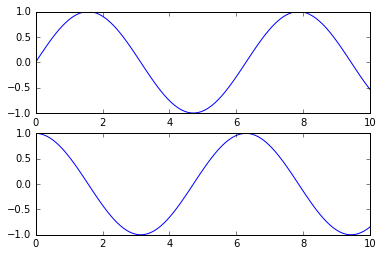

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

Es importante tener en cuenta que esta interfaz es *con estado*: realiza un seguimiento de la figura y los ejes "actuales", que es donde se aplican todos los comandos ``plt``.
Puede obtener una referencia a estos usando las rutinas ``plt.gcf()`` (obtener la figura actual) y ``plt.gca()`` (obtener los ejes actuales).
Si bien esta interfaz con estado es rápida y conveniente para gráficos simples, es fácil tener problemas.
Por ejemplo, una vez que se crea el segundo panel, ¿cómo podemos regresar y agregar algo al primero?
Esto es posible dentro de la interfaz de estilo MATLAB, pero un poco torpe.
Afortunadamente, hay una mejor manera.

#### Interfaz orientada a objetos
La interfaz orientada a objetos está disponible para estas situaciones más complicadas y para cuando quieras tener más control sobre tu figura.
En lugar de depender de alguna noción de una figura o ejes "activos", en la interfaz orientada a objetos las funciones de trazado son *métodos* de objetos explícitos ``Figura`` y ``Ejes``.
Para volver a crear el gráfico anterior utilizando este estilo de trazado, puede hacer lo siguiente:

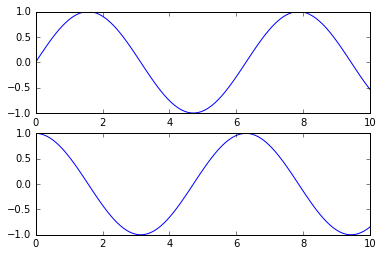

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Para tramas más simples, la elección de qué estilo usar es en gran medida una cuestión de preferencia, pero el enfoque orientado a objetos puede convertirse en una necesidad a medida que las tramas se vuelven más complicadas.
A lo largo de este capítulo, cambiaremos entre el estilo de MATLAB y las interfaces orientadas a objetos, según lo que sea más conveniente.
En la mayoría de los casos, la diferencia es tan pequeña como cambiar ``plt.plot()`` a ``ax.plot()``, pero hay algunos errores que destacaremos a medida que surjan en las siguientes secciones.